In [ ]:
from pylab import *
from scipy import *
import pandas as pd
import numpy

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# reading the data from csv files
dens_data = pd.read_csv('/content/gdrive/MyDrive/data/density_map_data')
dens_data = dens_data[['borough_name','venue_density']]
dep = pd.read_csv('gdrive/My Drive/data/IMD_clean.csv')
dep = dep[['Local Authority District name (2019)','IMD']]
dep = dep.rename(columns={'Local Authority District name (2019)':'borough_name'})
dep.head()

qual = pd.read_csv('gdrive/My Drive/data/percent_no_qualifications.csv')
qual = qual.rename(columns={'percent':'no qualifications (%)','NAME':'borough_name'})
qual.head()

eth = pd.read_csv('gdrive/My Drive/data/ethnicity_data_clean.csv')
eth= eth.rename(columns={'NAME':'borough_name'})
eth.head()

# merging datasets
merged = dens_data.merge(dep, on='borough_name')
merged1 = merged.merge(qual,on='borough_name')
merged2 = merged1.merge(eth, on='borough_name')
merged2 = merged2[['borough_name','venue_density','IMD','no qualifications (%)','quartile.1']]
merged2.head()
merged2['size'] = merged2['venue_density']*100000
merged2.head()

# drop NaN values
merged2 = merged2.dropna()

,borough_name,venue_density
0,Kingston upon Thames,0.004026
1,Croydon,0.004047
2,Bromley,0.002864
3,Hounslow,0.006892
4,Ealing,0.005581


In [ ]:
# populate a color column corresponding to quartile
dictionary = {
    1.0: 'blue',
    2.0: 'yellow',
    3.0: 'green',
    4.0: 'pink'
}

quartiles = merged2['quartile.1'].to_list()

colors = []
for i in quartiles:
 colors.append(dictionary[i])

merged2['color'] = colors
merged2.head()

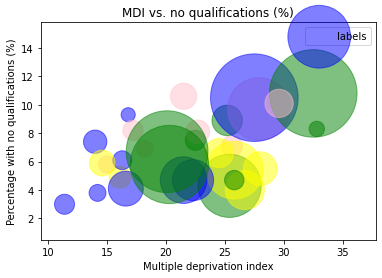

In [ ]:
# create scatter plot
plt.scatter('IMD','no qualifications (%)', 
            alpha=0.5,
            s=merged2['size'],
            c='color',
            data=merged2)
plt.xlabel("Multiple deprivation index", size=10)
plt.ylabel("Percentage with no qualifications (%)", size=10)
plt.title("MDI vs. no qualifications (%)", size=12)
plt.xlim((merged2['IMD'].min()-2), (merged2['IMD'].max())+5)
plt.ylim((merged2['no qualifications (%)'].min()-2.5), (merged2['no qualifications (%)'].max())+5)